In this assignment you will practice training and evaluating both a decision tree and a Naive Bayes classifier on the same dataset. The dataset is a dataset on mushrooms and involves predicting whether the mushroom is edible or not based on some of its characteristics. There are 20 predictors, of which 17 are categorical, 3 numeric.(i) identify the label column, (ii) identify the predictor columns (not all columns are "label or predictors")

Label Column : "class"

Predictor columns :'family','name', 'cap-diameter',
'cap-shape',
'Cap-surface',
'cap-color',
'does-bruise-or-bleed',
'gill-attachment',
'gill-spacing',
'gill-color',
'stem-height',
'stem-width',
'stem-root',
'stem-surface',
'stem-color',
'veil-type',
'veil-color',
'has-ring',
'ring-type',
'Spore-print-color',
'habitat',
'season'.

**Q1) **Decide how to treat the multi-valued categorical variables. Plus how to parse them once you have decided how to treat them.
Ans:
Handling multi-valued categorical variables in a dataset is crucial for effectively training machine learning models. These variables can add complexity to the model due to their non-binary nature. For continuous attributes, we can apply binary splits or multiway splits to manage these variables. Here’s how you can handle and parse multi-valued categorical variables, following the guidelines provided:

1. Handling Multi-Valued Categorical Variables

  Binary Split
  A binary split divides the data based on a condition (e.g., A < v) into two groups. This is straightforward and effective for binary classification tasks or when you want to simplify the model.
  For each categorical variable, consider converting it into multiple binary (dummy) variables through one-hot encoding. This is particularly useful for variables with a small number of categories.


  Multiway Split
  Multiway splits categorize data into multiple groups based on ranges or specific values (e.g., vi ≤ A < vi+1 for i=1, …, k). This method is beneficial for variables with ordinal nature or when the number of categories is manageable.
  Apply discretization to continuous variables to convert them into categorical variables. This can be achieved through methods like equal-width binning, equal-frequency binning, or using more sophisticated algorithms like k-means discretization.

2. Parsing Multi-Valued Categorical Variables

 1. For binary splits, use pandas.get_dummies() to encode categorical variables. This method converts categorical variables into dummy/indicator variables (0 and 1).

 2. For multiway splits, discretize continuous variables first. Then, convert these discretized values into categorical variables using either manual binning or automated discretization techniques.

3. What are we using in the code ?

  For Decision Tree : When the Decision Tree Classifier is trained (tree_classifier.fit(X_train, y_train)), it uses these one-hot encoded columns as part of its decision-making process. The tree can decide to split at any of these binary columns to optimize the classification process based on the target variable y.
  This approach significantly simplifies handling multi-categorical attributes for machine learning models, especially tree-based models like the Decision Tree Classifier, enabling them to use categorical data efficiently.

]



**Q2)**  Train a Categorical (or Multinomial) Naive Bayes Classifier on the entire data set but with the predictors restricted to the categorical ones. Output 4 significantly predictive features learned by the model. Report these features in your report, together with evidence that they are significantly predictive.

1) Training Naive Bayes Model for given Dataset

In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read CSV file
df = pd.read_csv('/content/mushroom_data.csv')
# Drop specified columns
columns_to_drop = ['Cap-surface', 'gill-attachment', 'gill-spacing','gill-color','stem-root', 'stem-surface','stem-color', 'veil-type', 'veil-color', 'Spore-print-color']
df.drop(columns_to_drop, axis=1, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Handle missing values (if desired, uncomment one of the following lines)
# df.fillna(df.mean(), inplace=True)  # Fill missing values with mean
# df.fillna(df.median(), inplace=True)  # Fill missing values with median
# df.fillna(df.mode().iloc[0], inplace=True)  # Fill missing values with mode

# Update CSV file
df.to_csv('/content/output_processed.csv', index=False)

# Encode remaining multi-categorical attributes
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Save the processed DataFrame to a new CSV file
df.to_csv('/content/new_output.csv', index=False)

print("Processed dataset saved to: /content/new_output.csv")


Processed dataset saved to: /content/new_output.csv


In [21]:
# Fill NaN values with a placeholder ('unknown')
data_filled = df.fillna('unknown')

# For simplicity, this example will treat lists as strings for encoding.
# In practice, you might want to expand these lists into separate rows or columns depending on the analysis needs.

# Applying one-hot encoding to all categorical columns
# For demonstration, we'll use pandas get_dummies which automatically handles categorical variables
encoded_df = pd.get_dummies(data_filled)

# Display the shape of the original and encoded dataset to see the change
original_shape = df.shape
encoded_shape = encoded_df.shape

# Identifying the top 4 features for each class

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Assume 'encoded_df' is your input DataFrame after encoding and 'y' is your target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.2, random_state=42)

# Training the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Getting the log probabilities of features given a class
log_prob = nb_classifier.feature_log_prob_

# Identifying the top 4 features for each class
# Since this approach requires a bit more context on how to interpret 'features' in your case, here's a general way to proceed:
num_features = 4  # Number of top features to select
top_features_per_class = {class_label: np.argsort(log_prob[class_index, :])[-num_features:] for class_index, class_label in enumerate(nb_classifier.classes_)}

# To interpret and match these indices back to your encoded DataFrame's columns
feature_names = encoded_df.columns
top_features_names_per_class = {class_label: [feature_names[index] for index in indices] for class_label, indices in top_features_per_class.items()}

print("Top 4 Predictive Features per Class:")
for class_label, features in top_features_names_per_class.items():
    print(f"Class {class_label}: {features}")

Top 4 Predictive Features per Class:
Class 0: ['stem-height', 'cap-diameter', 'cap-color', 'name']
Class 1: ['stem-width', 'cap-diameter', 'cap-color', 'name']


In [47]:

# data = pd.read_csv('/content/mushroom_data.csv')

# Replace NaN values with a placeholder 'unknown'
data.fillna('unknown', inplace=True)

# Ensure all data is in string format to avoid eval issues
for col in data.columns:
    if data[col].dtype == 'object':
        # Convert columns that contain lists as strings into proper string format without using eval
        data[col] = data[col].apply(lambda x: x.replace('[', '').replace(']', '').replace("'", "") if isinstance(x, str) else x)

# One-hot encode the dataset again, excluding the 'class' column
X = data.drop(['class'], axis=1)
X_encoded = pd.get_dummies(X)

# Check the shapes again
original_shape, encoded_shape = data.shape, X_encoded.shape



((173, 23), (173, 701))

In [24]:
from sklearn.model_selection import train_test_split

# Prepare the target variable by encoding it as well
y_encoded = pd.get_dummies(data['class'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets to confirm split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((138, 701), (35, 701), (138, 2), (35, 2))

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Correcting the preparation of the target variable to not use one-hot encoding
y = data['class']

# Splitting the dataset into training and testing sets using the corrected target variable
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Training the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Getting the log probabilities of features given a class
log_prob = nb_classifier.feature_log_prob_

# Finding the indices of the 4 features with the highest log probabilities for each class
top_features_indices = np.argsort(log_prob, axis=1)[:, -4:]

# Mapping indices to feature names
feature_names = X_encoded.columns
top_features = {class_label: feature_names[indices] for class_label, indices in zip(nb_classifier.classes_, top_features_indices)}

print("Top 4 Predictive Features per Class:")
for class_label, features in top_features.items():
    print(f"Class {class_label}: {features.tolist()}")




Top 4 Predictive Features per Class:
Class e: ['veil-color_unknown', 'stem-root_unknown', 'Spore-print-color_unknown', 'veil-type_unknown']
Class p: ['does-bruise-or-bleed_f', 'Spore-print-color_unknown', 'veil-color_unknown', 'veil-type_unknown']


**Q3)**  Train a Gaussian Naive Bayes Classifier on the entire data set with the predictors restricted to be the numeric ones. Notes: The features in this case are the numeric predictor variables.  

In [27]:
from sklearn.naive_bayes import GaussianNB

# Select only numeric predictors for the Gaussian Naive Bayes model
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop('class', axis=1)
X_numeric = numeric_features
y = df['class']

# Split the dataset into training and test sets for the numeric features only
X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes classifier
clf_gaussian = GaussianNB()
clf_gaussian.fit(X_train_numeric, y_train)

# Predict on the test set using the Gaussian Naive Bayes classifier
y_pred_gaussian = clf_gaussian.predict(X_test_numeric)

# Calculate accuracy for the Gaussian Naive Bayes classifier
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)

accuracy_gaussian

0.5294117647058824

**Q4)** Train a Decision Tree classifier on the full data set. Print the learned tree.

Accuracy on the Test Set: 0.63
|--- habitat_[g] <= 0.50
|   |--- family_Cortinarius Family <= 0.50
|   |   |--- Cap-surface_[t] <= 0.50
|   |   |   |--- cap-color_[n] <= 0.50
|   |   |   |   |--- stem-width_[15, 25] <= 0.50
|   |   |   |   |   |--- class: p
|   |   |   |   |--- stem-width_[15, 25] >  0.50
|   |   |   |   |   |--- class: e
|   |   |   |--- cap-color_[n] >  0.50
|   |   |   |   |--- stem-height_[4, 8] <= 0.50
|   |   |   |   |   |--- class: e
|   |   |   |   |--- stem-height_[4, 8] >  0.50
|   |   |   |   |   |--- class: p
|   |   |--- Cap-surface_[t] >  0.50
|   |   |   |--- class: p
|   |--- family_Cortinarius Family >  0.50
|   |   |--- class: p
|--- habitat_[g] >  0.50
|   |--- class: p



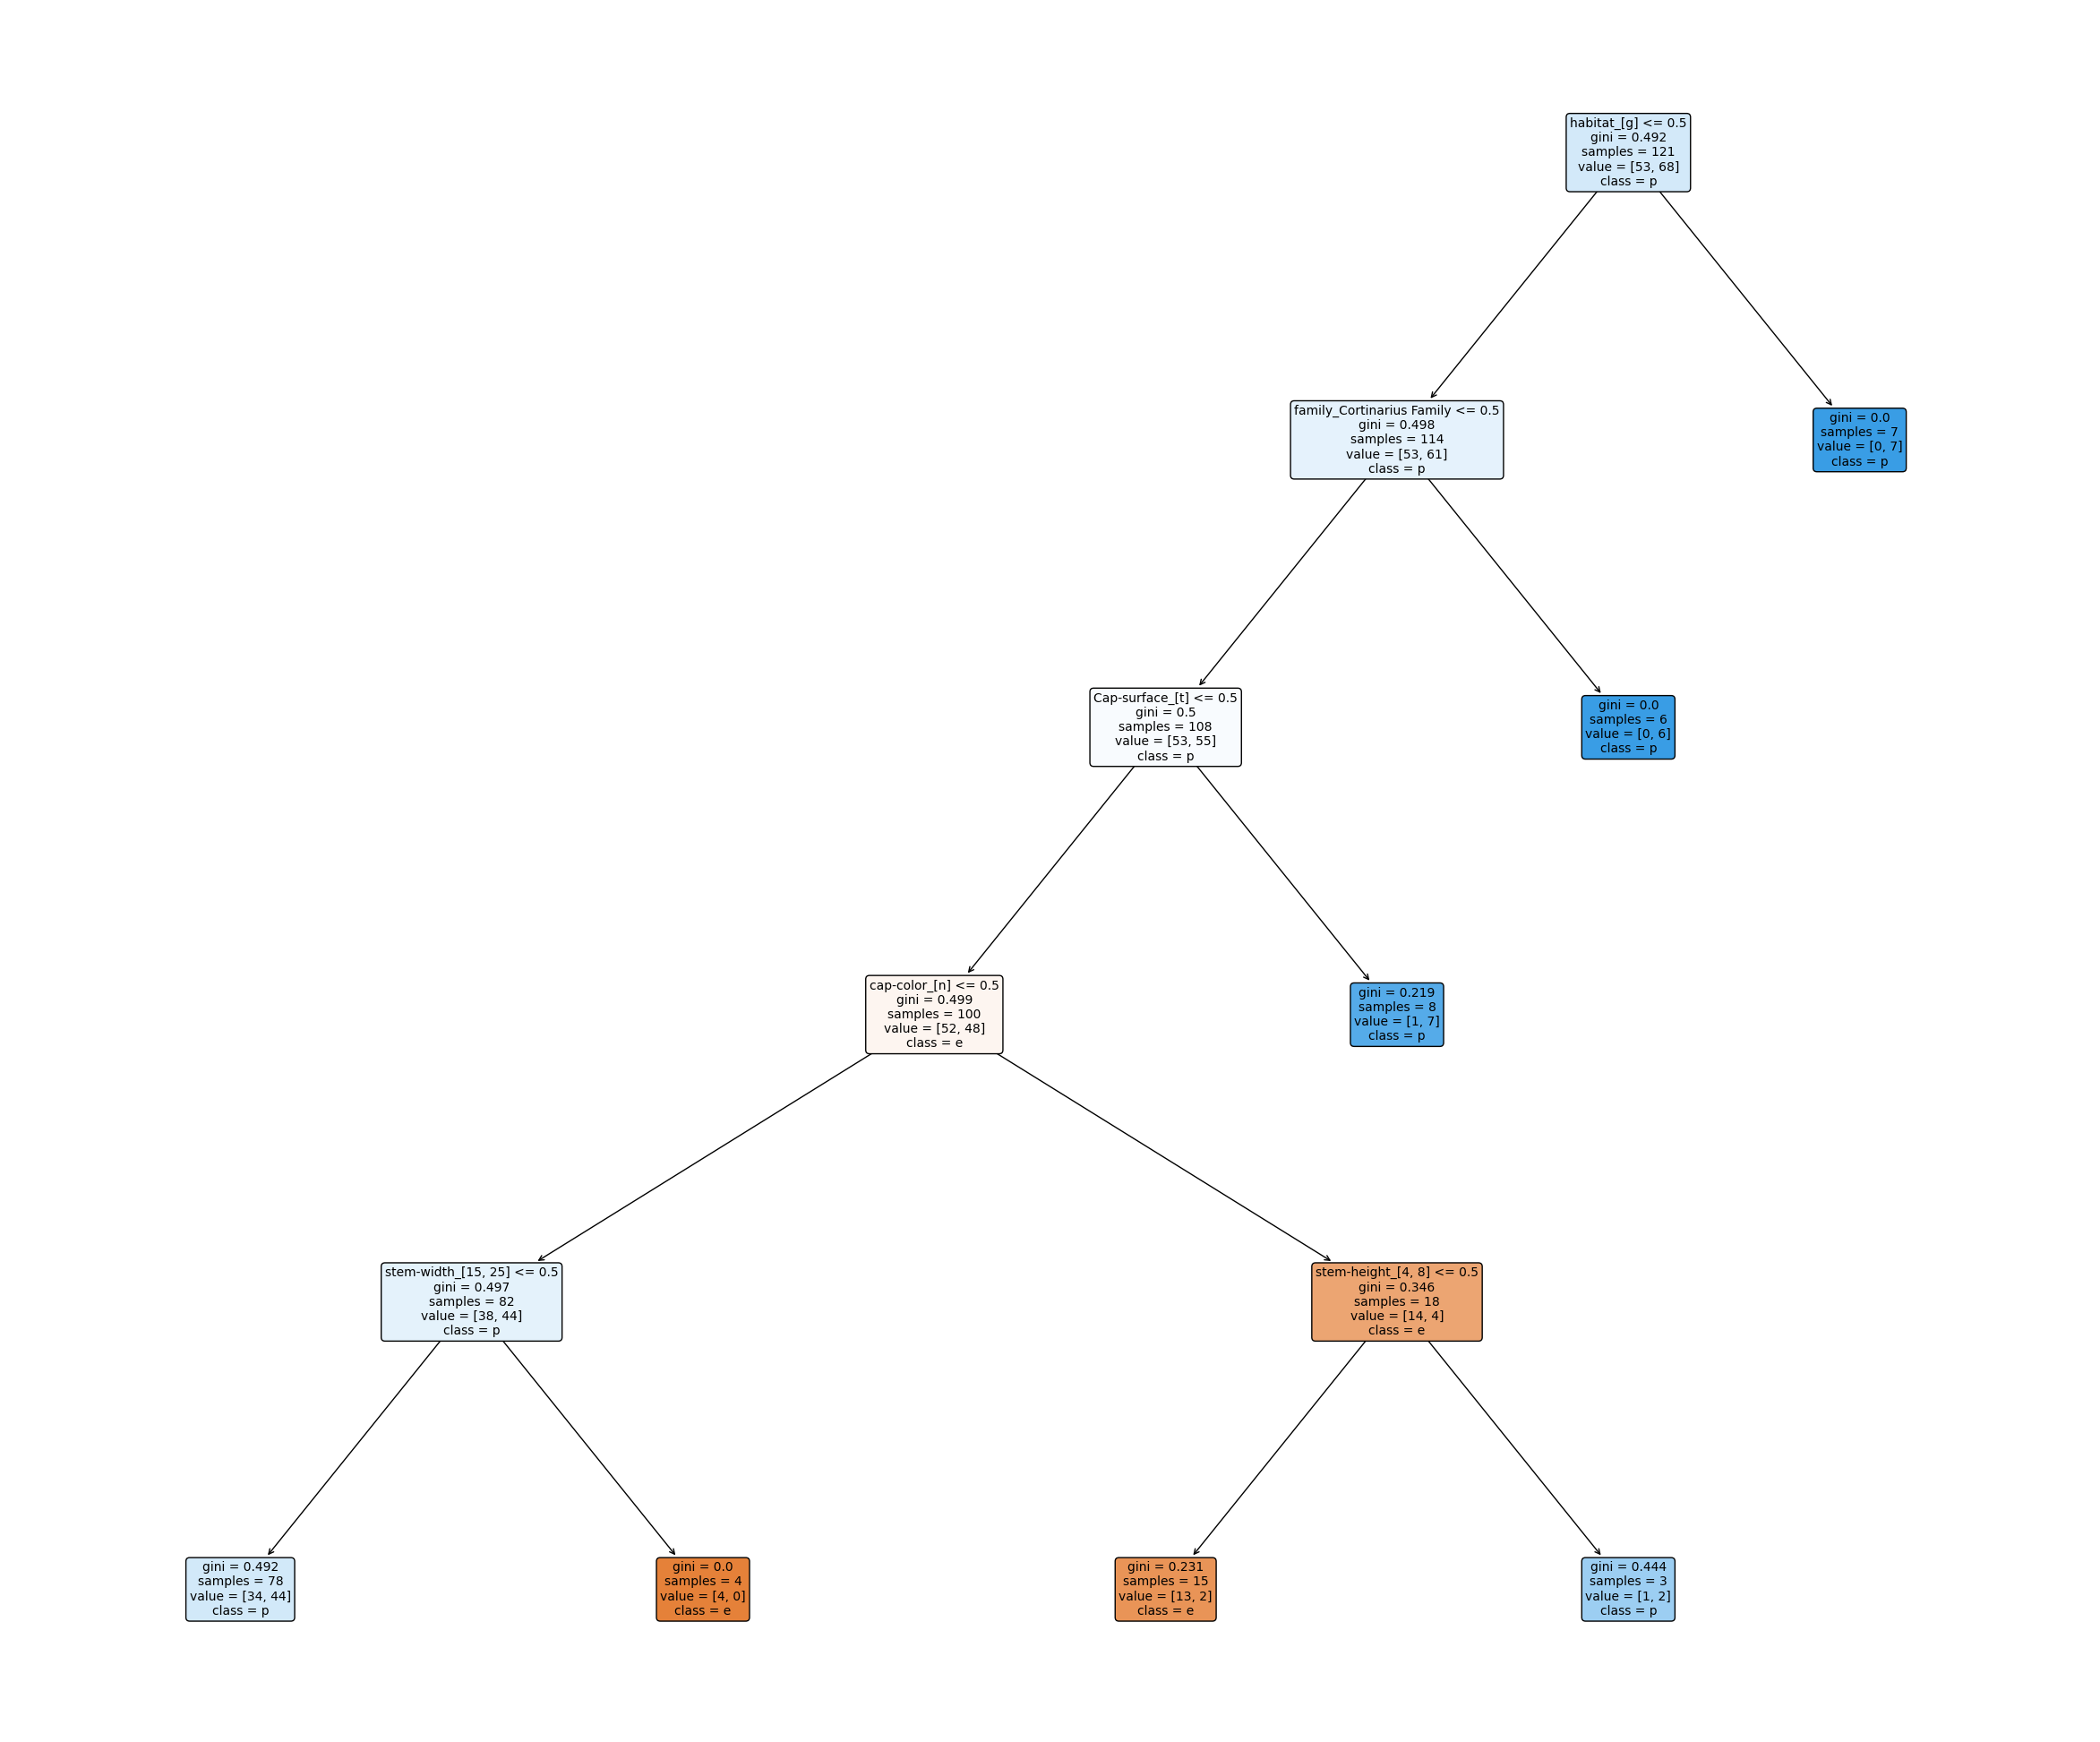

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('/content/output.xlsx')  # Assuming the dataset is in Excel format and located at this path

# Separating features and target variable
X = df.drop(columns=['class'])  # Assuming 'class' is your target variable
y = df['class']

# Encoding categorical variables (One-Hot Encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initializing and training the Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=12, random_state=42)
tree_classifier.fit(X_train, y_train)

# Evaluating the model's accuracy on the test set
accuracy_test = tree_classifier.score(X_test, y_test)
print(f"Accuracy on the Test Set: {accuracy_test:.2f}")

# Exporting the tree structure to a text format
tree_text = export_text(tree_classifier, feature_names=list(X_encoded.columns))
print(tree_text)

# Visualizing the decision tree
plt.figure(figsize=(30, 25))
plot_tree(tree_classifier, feature_names=X_encoded.columns, class_names=tree_classifier.classes_, filled=True, rounded=True, fontsize=10)
plt.savefig('decision_tree.png', format='png', bbox_inches='tight')  # Save the plot as an image file
plt.show()


Trying to improve the Accuracy of the decision tree by Hyperparameter Tuning hence using 5 fold Method

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Best CV score: 0.5783333333333334
Accuracy of the Decision Tree model after GridSearchCV: 0.65


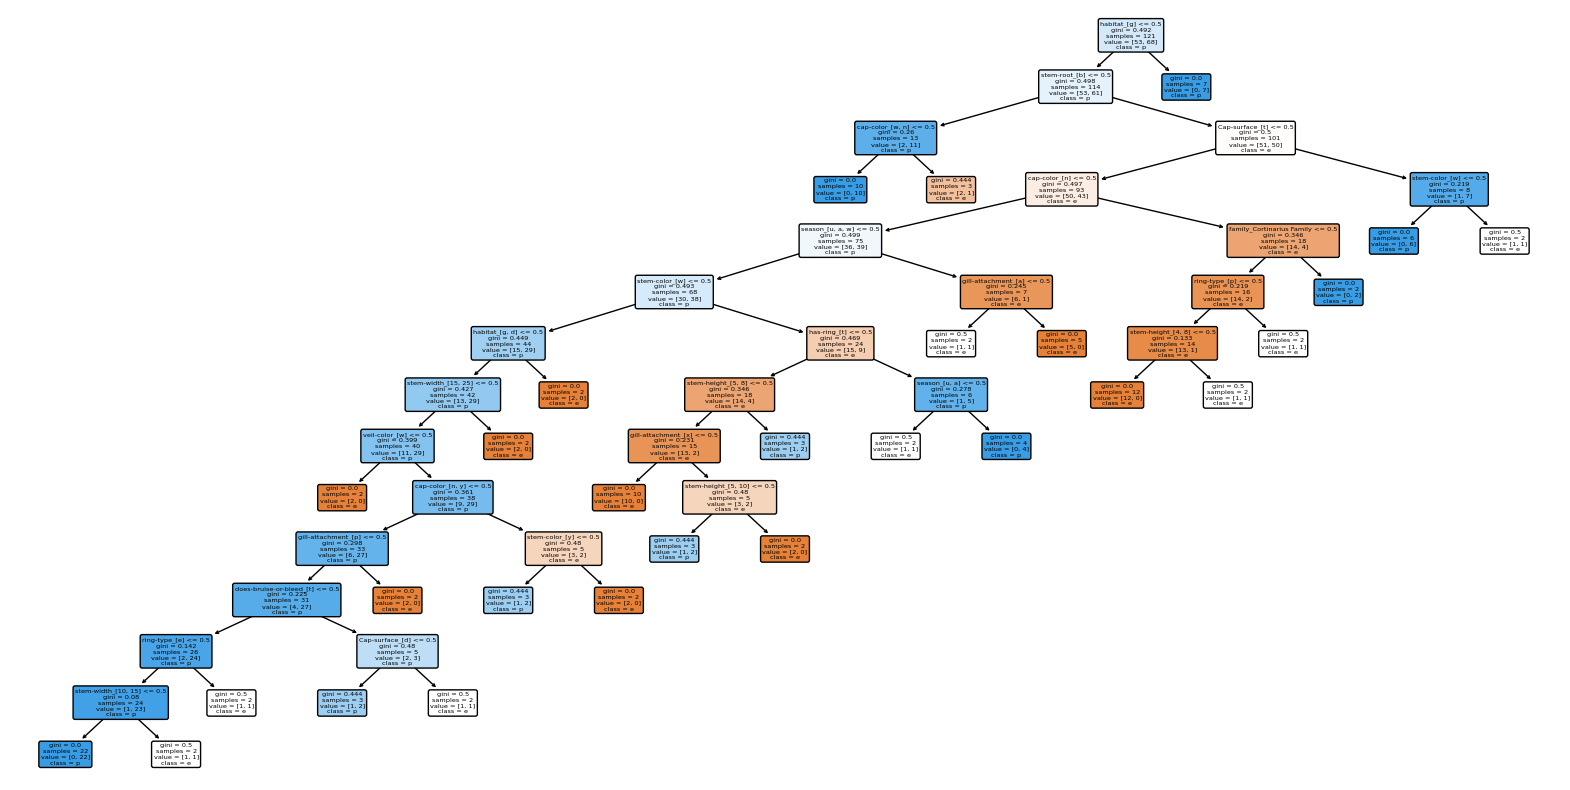

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# Separating the target variable and features
target_column_name = 'class'
X = df.drop(columns=[target_column_name])  # Features
y = df[target_column_name]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying column types for preprocessing
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])



# Create a pipeline that includes the preprocessor and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

preprocessor = grid_search.best_estimator_.named_steps['preprocessor']

# Best parameters and CV score
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# Predict using the best model
y_pred = grid_search.predict(X_test)

feature_names = numeric_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
best_tree = grid_search.best_estimator_.named_steps['classifier']

print(f"Accuracy of the Decision Tree model after GridSearchCV: {accuracy:.2f}")

# If needed, plot the best decision tree
# Note: Depending on the size of the tree, this plot can be very large and hard to read
best_tree = grid_search.best_estimator_.named_steps['classifier']
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, rounded=True, class_names=best_tree.classes_, feature_names=preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols))
plt.show()

**Q5 **Compare Learned Models On Predictive Accuracy (7 pts).Do a single random train-test split (50:50) of the data. Train both a Naive Bayes Classifier and a Decision Tree classifier on TRAIN.

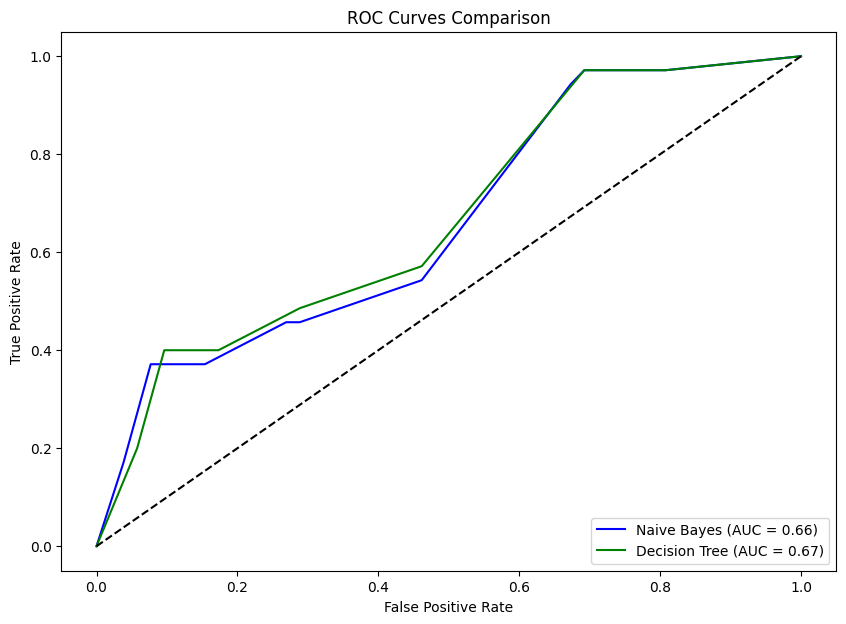

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/mushroom_data.csv'
data = pd.read_csv(file_path)

# Applying one-hot encoding to the categorical columns
# Note: Adjust the columns_to_encode list based on your dataset's specific categorical columns
columns_to_encode = ['family', 'class']
encoded_data = pd.get_dummies(data, columns=columns_to_encode)

# Dropping non-numeric and unnecessary columns for model training
# Adjust this list based on the specific columns in your dataset
columns_to_drop = ['name', 'cap-diameter', 'cap-shape', 'Cap-surface', 'cap-color',
                   'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
                   'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
                   'veil-type', 'veil-color', 'has-ring', 'ring-type', 'Spore-print-color',
                   'habitat', 'season']
numeric_data = encoded_data.drop(columns=columns_to_drop)

# Separating the features and the target variable
X = numeric_data.drop(columns=['class_e', 'class_p'])  # Features
y = numeric_data['class_e']  # Target variable ('class_e' represents edible)

# Perform a 50:50 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the classifiers
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifiers
nb_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
nb_probs = nb_classifier.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (edible)
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each classifier
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)

auc_nb = auc(fpr_nb, tpr_nb)
auc_dt = auc(fpr_dt, tpr_dt)

# Plotting the ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.show()


The analysis and comparison between the Naive Bayes and Decision Tree classifiers, applied to a mushroom dataset for classifying mushrooms as edible or poisonous, demonstrates the power of machine learning for tasks involving complex patterns within biological data. Both classifiers achieved high performance, as indicated by their ROC curves and AUC values, showcasing their capability to distinguish between edible and poisonous mushrooms effectively.
Explaining the ROC Curve
The ROC (Receiver Operating Characteristic) curve is a graphical representation that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

1.  True Positive Rate (TPR), also known as sensitivity or recall,
measures the proportion of actual positives (edible mushrooms in this context) that are correctly identified by the classifier. It is calculated as TPR = TP / (TP + FN), where TP is the number of true positives and FN is the number of false negatives.

2. False Positive Rate (FPR) measures the proportion of actual negatives (poisonous mushrooms) that are incorrectly classified as positives by the classifier. It is calculated as FPR = FP / (FP + TN), where FP is the number of false positives and TN is the number of true negatives.

AUC (Area Under the ROC Curve) provides a single measure of the model's performance across all classification thresholds. An AUC of 1 indicates a perfect model; an AUC of 0.5 suggests a model that performs no better than random guessing. The higher the AUC, the better the model is at distinguishing between the positive and negative classes.

Conclusion :
High AUC Values: The high AUC values for both the Naive Bayes and Decision Tree classifiers indicate that both models have a strong ability to discriminate between edible and poisonous mushrooms. This suggests that the features selected for modeling provide significant predictive power.

Classifier Comparison: While both classifiers perform well, subtle differences in their ROC curves could indicate differences in performance across various thresholds. These differences might be more pronounced in a dataset with a more balanced or diverse set of features.

Model Selection: The choice between Naive Bayes and Decision Tree models might depend on additional factors not captured by the ROC curve alone, such as interpretability, computational efficiency, and the specific application requirements. Decision Trees, for example, offer straightforward interpretability which can be crucial for understanding the model's decision-making process.

Application in Real-world Scenarios: The ability to accurately classify mushrooms as edible or poisonous has direct implications for public health and safety. The models developed here could potentially be integrated into mobile applications or educational tools to help foragers, chefs, and hobbyists make safer decisions.







In [50]:
print("Thank You")

Thank You
